# **Aula 10 - Deep Learning - Técnicas de Otimização**

## **Objetivos**

* Conhecer e praticar as Técnicas de Otimização
* Praticar a classificação de objeto usando Keras/TensorFlow

## **Definição do Problema**

Desenvolver um **Modelo de Rede Neural Artificial Convolucional** e aplicar as técnicas de otimização para que o modelo seja capaz de classificar as imagens do dataset CIFAR-100: https://www.tensorflow.org/datasets/catalog/cifar100?hl=pt-br

## **Roteiro**

### **1** - Carregando as Bibliotecas

In [1]:
# Importar as bibliotecas
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

### **2** - Carregando o Dataset

In [2]:
# Carrega o dataset
cifar = keras.datasets.cifar100
# Carrega os dados de treino e teste
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()

169001437/169001437 [==============================] - 4s 0us/step


### **3** - Explorando o Dataset

In [3]:
# Mostra as caracteristicas do dataset
print(train_images.shape)
print(test_images.shape)
print(np.unique(train_labels))

(50000, 32, 32, 3)
(10000, 32, 32, 3)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


### **4 - Analisando os dados**

[29]


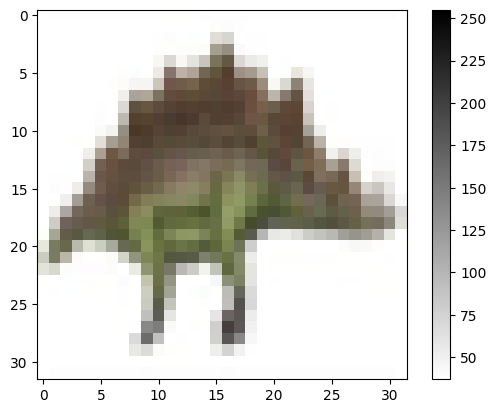

In [4]:
# Exibe uma amostra do dataset
plt.figure()
plt.imshow(train_images[1], cmap = 'binary')
plt.colorbar()
print(train_labels[1])

[29]


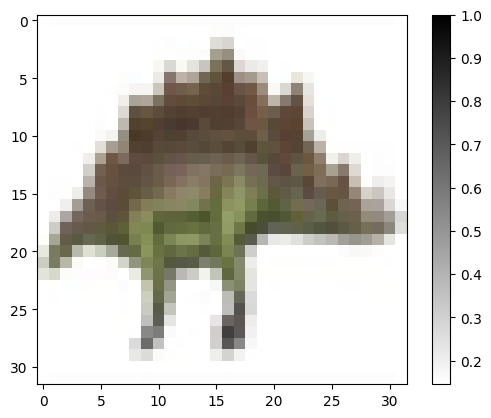

In [5]:
# Normalizando a escala para ficar entre 0 e 1
train_images = train_images/255
test_images = test_images/255
plt.figure()
plt.imshow(train_images[1], cmap = 'binary')
plt.colorbar()
print(train_labels[1])


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


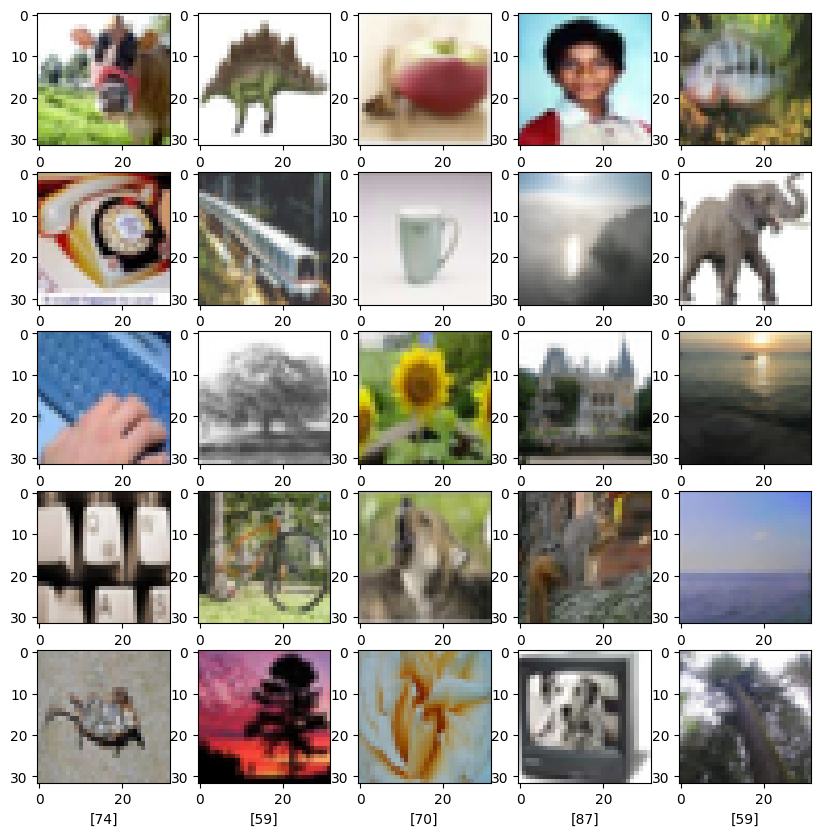

In [6]:
# Mostrando o dataset normalizado
plt.figure(figsize =(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(train_images[i], cmap = 'binary')
  plt.xlabel(train_labels[i])

### **5 - Criando o Modelo**

In [7]:
# Criando o modelo com keras
tf.random.set_seed(42)

model = keras.Sequential([
    # Camada de entrada Flatten para transformar a matriz de 32x32, com 3 canais para um vetor
    keras.layers.Flatten(input_shape=(32,32,3)),
    # Camada Oculta Densa (totalmente conectada) de 256 neuronios, com funçao de ativação Relu
    keras.layers.Dense(256, activation = tf.nn.relu),
    # Camada de saida Densa de 10 neuronios, com funçao de ativaçao softmax
    keras.layers.Dense(100, activation=tf.nn.softmax)
])


### **6 - Compilando o Modelo**

In [8]:
# Compila o modelo com fuçao Loss e metrica de acuracia
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Mostra o modelo compilado
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 100)               25700     
                                                                 
Total params: 812388 (3.10 MB)
Trainable params: 812388 (3.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### **7 - Treinando o Modelo**

In [9]:
# Treina o modelo, com 5 épocas
history = model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 9s 3ms/step - loss: 4.2491 - accuracy: 0.0541
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 3.8910 - accuracy: 0.1069
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 3.8164 - accuracy: 0.1217
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 3.7952 - accuracy: 0.1287
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 3.7932 - accuracy: 0.1288


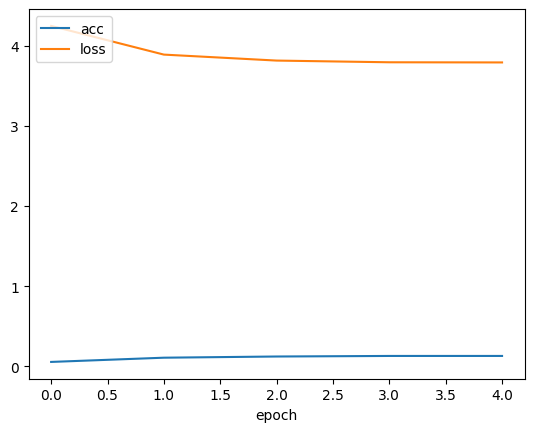

In [10]:
# Plotando a acuracia e a Loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.legend(['acc','loss'], loc='upper left')
plt.show()

### **8 - Criando um Modelo baseado em CNN**

In [11]:
# Criando um modelo de rede neural sequencial.
model2 = keras.Sequential()

# Adiciona uma camada de convolução 2D com 32 filtros de tamanho 5x5, que usa a função de ativação ReLU
# e tem uma entrada de imagem 2D com altura e largura de 28 pixels e um único canal de cor (escala de cinza).
model2.add( keras.layers.Conv2D(filters=32, kernel_size=5, padding='same',
                                activation ='relu', input_shape=(32,32,3)) )

# Adiciona uma camada de max pooling 2D que reduz a dimensão da imagem de entrada pela metade
# (em ambas as direções - altura e largura) usando uma janela de 2x2 pixels e um passo de 2 pixels.
# A camada é adicionada à rede neural após a camada de convolução, o que ajuda a reduzir o número
# de parâmetros e a extrair as características mais importantes da imagem.
model2.add( keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

# Adiciona uma camada de convolução 2D com 64 filtros de tamanho 5x5, que usa a função de ativação ReLU
# e tem uma entrada de imagem 2D com altura e largura de 28 pixels e um único canal de cor (escala de cinza).
model2.add( keras.layers.Conv2D(filters=64, kernel_size=5, padding='same', activation ='relu'))

# Adiciona uma camada de max pooling 2D que reduz a dimensão da imagem de entrada pela metade
# (em ambas as direções - altura e largura) usando uma janela de 2x2 pixels e um passo de 2 pixels.
# A camada é adicionada à rede neural após a camada de convolução, o que ajuda a reduzir o número
# de parâmetros e a extrair as características mais importantes da imagem
model2.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

# Adiciona uma camada de convolução 2D com 128 filtros de tamanho 5x5, que usa a função de ativação ReLU
# e tem uma entrada de imagem 2D com altura e largura de 28 pixels e um único canal de cor (escala de cinza).
model2.add( keras.layers.Conv2D(filters=128, kernel_size=5, padding='same', activation ='relu'))

# Adiciona uma camada de max pooling 2D que reduz a dimensão da imagem de entrada pela metade
# (em ambas as direções - altura e largura) usando uma janela de 2x2 pixels e um passo de 2 pixels.
# A camada é adicionada à rede neural após a camada de convolução, o que ajuda a reduzir o número
# de parâmetros e a extrair as características mais importantes da imagem
model2.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

# Transforma a imagem no formato de "matriz" em um vetor
model2.add(keras.layers.Flatten())

# Adiciona uma camada de 1024 neuronios totalmente conectados (Densa) com função de ativação ReLU
model2.add(keras.layers.Dense(1024, activation='relu'))

# Adiciona uma camada de 100 neurônios totalmente conectados (Densa), que calcula
# as probabilidades de cada classe usando a função softmax.
model2.add(keras.layers.Dense(100, activation='softmax'))

### **9 - Compilando o Modelo baseado em CNN**

In [12]:
# Compila o modelo model2 com o otimizador Adam, a função de perda de entropia cruzada categórica esparsa
# e a métrica de acurácia. O modelo agora está pronto para ser treinado.
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Vamos mostrar como ficou a rede
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         204928    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)        

### **10 - Treinando o Modelo baseado em CNN**

In [13]:
# Treinando nosso modelo!
history = model2.fit(train_images, train_labels, epochs = 25)

Epoch 1/25
1563/1563 [==============================] - 15s 6ms/step - loss: 3.6949 - accuracy: 0.1379
Epoch 2/25
1563/1563 [==============================] - 9s 6ms/step - loss: 2.9005 - accuracy: 0.2816
Epoch 3/25
1563/1563 [==============================] - 8s 5ms/step - loss: 2.4457 - accuracy: 0.3693
Epoch 4/25
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0420 - accuracy: 0.4576
Epoch 5/25
1563/1563 [==============================] - 9s 5ms/step - loss: 1.6294 - accuracy: 0.5526
Epoch 6/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2153 - accuracy: 0.6538
Epoch 7/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8542 - accuracy: 0.7495
Epoch 8/25
1563/1563 [==============================] - 9s 5ms/step - loss: 0.6024 - accuracy: 0.8176
Epoch 9/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4486 - accuracy: 0.8611
Epoch 10/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.38

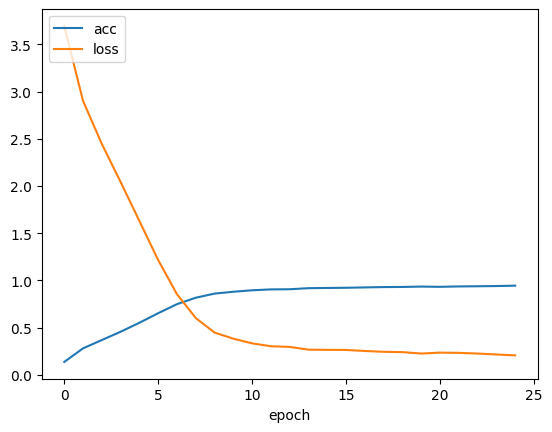

In [14]:
# Plotando a acuracia e a Loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.legend(['acc','loss'], loc='upper left')
plt.show()

In [15]:
# Testando o Modelo
test_loss, test_acc = model2.evaluate(test_images, test_labels)

print(test_loss)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 9.9165 - accuracy: 0.3189
9.916471481323242
0.3188999891281128


# **Técnicas de regularização**

In [16]:
# Códigos Uteis
def plot_history(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.xlabel('epoch')
  plt.legend(['loss','val_loss'], loc='lower left')
  plt.show()

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.xlabel('epoch')
  plt.legend(['acc','val_acc'], loc='upper left')
  plt.show()


### **VALIDATION**

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 128)         204928    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 128)        

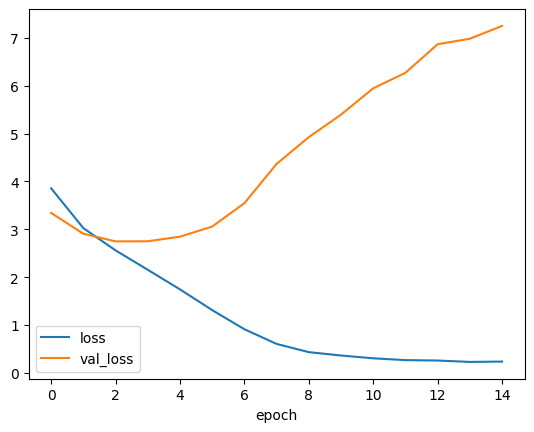

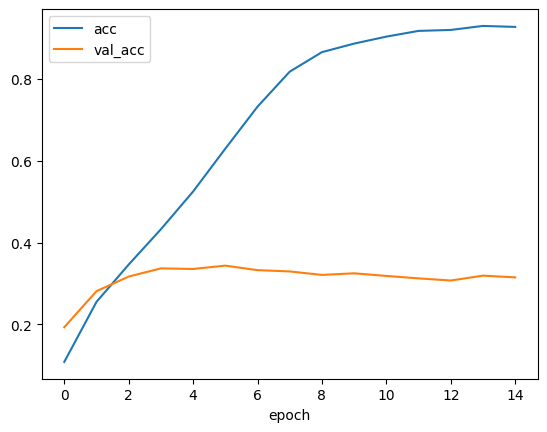

313/313 [==============================] - 1s 4ms/step - loss: 7.0565 - accuracy: 0.3255
7.056454658508301
0.3255000114440918


In [17]:
# Criando um modelo de rede neural sequencial.
model3 = keras.Sequential()

# Adiciona uma camada de convolução 2D com 32 filtros de tamanho 5x5, que usa a função de ativação ReLU
# e tem uma entrada de imagem 2D com altura e largura de 28 pixels e um único canal de cor (escala de cinza).
model3.add( keras.layers.Conv2D(filters=32, kernel_size=5, padding='same',
                                activation ='relu', input_shape=(32,32,3)) )

# Adiciona uma camada de max pooling 2D que reduz a dimensão da imagem de entrada pela metade
# (em ambas as direções - altura e largura) usando uma janela de 2x2 pixels e um passo de 2 pixels.
# A camada é adicionada à rede neural após a camada de convolução, o que ajuda a reduzir o número
# de parâmetros e a extrair as características mais importantes da imagem.
model3.add( keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

# Adiciona uma camada de convolução 2D com 64 filtros de tamanho 5x5, que usa a função de ativação ReLU
# e tem uma entrada de imagem 2D com altura e largura de 28 pixels e um único canal de cor (escala de cinza).
model3.add( keras.layers.Conv2D(filters=64, kernel_size=5, padding='same', activation ='relu'))

# Adiciona uma camada de max pooling 2D que reduz a dimensão da imagem de entrada pela metade
# (em ambas as direções - altura e largura) usando uma janela de 2x2 pixels e um passo de 2 pixels.
# A camada é adicionada à rede neural após a camada de convolução, o que ajuda a reduzir o número
# de parâmetros e a extrair as características mais importantes da imagem
model3.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

# Adiciona uma camada de convolução 2D com 128 filtros de tamanho 5x5, que usa a função de ativação ReLU
# e tem uma entrada de imagem 2D com altura e largura de 28 pixels e um único canal de cor (escala de cinza).
model3.add( keras.layers.Conv2D(filters=128, kernel_size=5, padding='same', activation ='relu'))

# Adiciona uma camada de max pooling 2D que reduz a dimensão da imagem de entrada pela metade
# (em ambas as direções - altura e largura) usando uma janela de 2x2 pixels e um passo de 2 pixels.
# A camada é adicionada à rede neural após a camada de convolução, o que ajuda a reduzir o número
# de parâmetros e a extrair as características mais importantes da imagem
model3.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

# Transforma a imagem no formato de "matriz" em um vetor
model3.add(keras.layers.Flatten())

# Adiciona uma camada de 1024 neuronios totalmente conectados (Densa) com função de ativação ReLU
model3.add(keras.layers.Dense(1024, activation='relu'))

# Adiciona uma camada de 10 neurônios totalmente conectados (Densa), que calcula
# as probabilidades de cada classe usando a função softmax.
model3.add(keras.layers.Dense(100, activation='softmax'))

# Compila o modelo model2 com o otimizador Adam, a função de perda de entropia cruzada categórica esparsa
# e a métrica de acurácia. O modelo agora está pronto para ser treinado.
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Vamos mostrar como ficou a rede
model3.summary()

#treina o modelo
history = model3.fit(train_images, train_labels, epochs = 15, validation_split = 0.2)
plot_history(history)

# Testando o Modelo
test_loss, test_acc = model3.evaluate(test_images, test_labels)

print(test_loss)
print(test_acc)

### **DROPOUT**

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)         

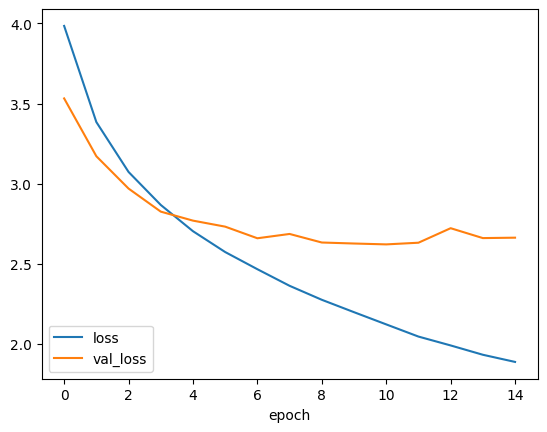

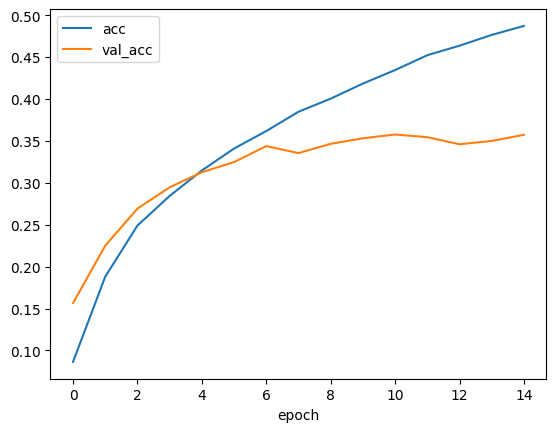

313/313 [==============================] - 1s 4ms/step - loss: 2.6326 - accuracy: 0.3680
2.6326041221618652
0.36800000071525574


In [18]:
from keras.layers import Dropout

# Criando um modelo de rede neural sequencial.
model4 = keras.Sequential()

# Adiciona uma camada de convolução 2D com 32 filtros de tamanho 5x5, que usa a função de ativação ReLU
# e tem uma entrada de imagem 2D com altura e largura de 28 pixels e um único canal de cor (escala de cinza).
model4.add( keras.layers.Conv2D(filters=32, kernel_size=5, padding='same',
                                activation ='relu', input_shape=(32,32,3)) )

# Adiciona uma camada de max pooling 2D que reduz a dimensão da imagem de entrada pela metade
# (em ambas as direções - altura e largura) usando uma janela de 2x2 pixels e um passo de 2 pixels.
# A camada é adicionada à rede neural após a camada de convolução, o que ajuda a reduzir o número
# de parâmetros e a extrair as características mais importantes da imagem.
model4.add( keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model4.add(Dropout(0.2))

# Adiciona uma camada de convolução 2D com 64 filtros de tamanho 5x5, que usa a função de ativação ReLU
# e tem uma entrada de imagem 2D com altura e largura de 28 pixels e um único canal de cor (escala de cinza).
model4.add( keras.layers.Conv2D(filters=64, kernel_size=5, padding='same', activation ='relu'))

# Adiciona uma camada de max pooling 2D que reduz a dimensão da imagem de entrada pela metade
# (em ambas as direções - altura e largura) usando uma janela de 2x2 pixels e um passo de 2 pixels.
# A camada é adicionada à rede neural após a camada de convolução, o que ajuda a reduzir o número
# de parâmetros e a extrair as características mais importantes da imagem
model4.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model4.add(Dropout(0.2))

# Adiciona uma camada de convolução 2D com 128 filtros de tamanho 5x5, que usa a função de ativação ReLU
# e tem uma entrada de imagem 2D com altura e largura de 28 pixels e um único canal de cor (escala de cinza).
model4.add( keras.layers.Conv2D(filters=128, kernel_size=5, padding='same', activation ='relu'))

# Adiciona uma camada de max pooling 2D que reduz a dimensão da imagem de entrada pela metade
# (em ambas as direções - altura e largura) usando uma janela de 2x2 pixels e um passo de 2 pixels.
# A camada é adicionada à rede neural após a camada de convolução, o que ajuda a reduzir o número
# de parâmetros e a extrair as características mais importantes da imagem
model4.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model4.add(Dropout(0.2))

# Transforma a imagem no formato de "matriz" em um vetor
model4.add(keras.layers.Flatten())
model4.add(Dropout(0.2))

# Adiciona uma camada de 1024 neuronios totalmente conectados (Densa) com função de ativação ReLU
model4.add(keras.layers.Dense(1024, activation='relu'))
model4.add(Dropout(0.2))

# Adiciona uma camada de 10 neurônios totalmente conectados (Densa), que calcula
# as probabilidades de cada classe usando a função softmax.
model4.add(keras.layers.Dense(100, activation='softmax'))

# Compila o modelo model2 com o otimizador Adam, a função de perda de entropia cruzada categórica esparsa
# e a métrica de acurácia. O modelo agora está pronto para ser treinado.
model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Vamos mostrar como ficou a rede
model4.summary()

#treina o modelo
history = model4.fit(train_images, train_labels, epochs = 15, validation_split = 0.2)
plot_history(history)

# Testando o Modelo
test_loss, test_acc = model4.evaluate(test_images, test_labels)

print(test_loss)
print(test_acc)

### **BATCH NORMALIZATION**

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                           
                                                      

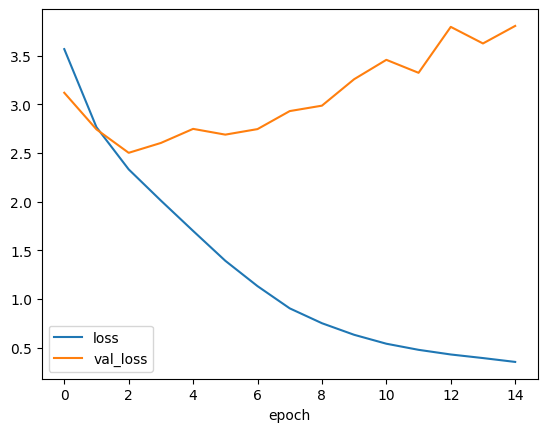

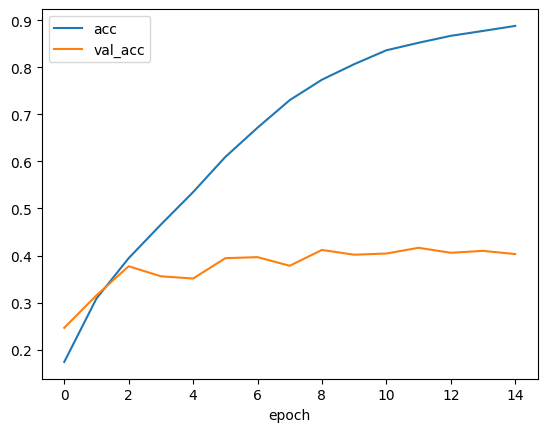

313/313 [==============================] - 1s 4ms/step - loss: 3.7325 - accuracy: 0.4173
3.732530355453491
0.4172999858856201


In [19]:
from keras.layers import BatchNormalization

# Criando um modelo de rede neural sequencial.
model5 = keras.Sequential()

# Adiciona uma camada de convolução 2D com 32 filtros de tamanho 5x5, que usa a função de ativação ReLU
# e tem uma entrada de imagem 2D com altura e largura de 28 pixels e um único canal de cor (escala de cinza).
model5.add( keras.layers.Conv2D(filters=32, kernel_size=5, padding='same',
                                activation ='relu', input_shape=(32,32,3)) )

# Adiciona uma camada de max pooling 2D que reduz a dimensão da imagem de entrada pela metade
# (em ambas as direções - altura e largura) usando uma janela de 2x2 pixels e um passo de 2 pixels.
# A camada é adicionada à rede neural após a camada de convolução, o que ajuda a reduzir o número
# de parâmetros e a extrair as características mais importantes da imagem.
model5.add( keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model5.add(BatchNormalization())

# Adiciona uma camada de convolução 2D com 64 filtros de tamanho 5x5, que usa a função de ativação ReLU
# e tem uma entrada de imagem 2D com altura e largura de 28 pixels e um único canal de cor (escala de cinza).
model5.add( keras.layers.Conv2D(filters=64, kernel_size=5, padding='same', activation ='relu'))

# Adiciona uma camada de max pooling 2D que reduz a dimensão da imagem de entrada pela metade
# (em ambas as direções - altura e largura) usando uma janela de 2x2 pixels e um passo de 2 pixels.
# A camada é adicionada à rede neural após a camada de convolução, o que ajuda a reduzir o número
# de parâmetros e a extrair as características mais importantes da imagem
model5.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model5.add(BatchNormalization())

# Adiciona uma camada de convolução 2D com 128 filtros de tamanho 5x5, que usa a função de ativação ReLU
# e tem uma entrada de imagem 2D com altura e largura de 28 pixels e um único canal de cor (escala de cinza).
model5.add( keras.layers.Conv2D(filters=128, kernel_size=5, padding='same', activation ='relu'))

# Adiciona uma camada de max pooling 2D que reduz a dimensão da imagem de entrada pela metade
# (em ambas as direções - altura e largura) usando uma janela de 2x2 pixels e um passo de 2 pixels.
# A camada é adicionada à rede neural após a camada de convolução, o que ajuda a reduzir o número
# de parâmetros e a extrair as características mais importantes da imagem
model5.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model5.add(BatchNormalization())

# Transforma a imagem no formato de "matriz" em um vetor
model5.add(keras.layers.Flatten())
model5.add(Dropout(0.33))

# Adiciona uma camada de 1024 neuronios totalmente conectados (Densa) com função de ativação ReLU
model5.add(keras.layers.Dense(1024, activation='relu'))

# Adiciona uma camada de 10 neurônios totalmente conectados (Densa), que calcula
# as probabilidades de cada classe usando a função softmax.
model5.add(keras.layers.Dense(100, activation='softmax'))

# Compila o modelo model2 com o otimizador Adam, a função de perda de entropia cruzada categórica esparsa
# e a métrica de acurácia. O modelo agora está pronto para ser treinado.
model5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Vamos mostrar como ficou a rede
model5.summary()

#treina o modelo
history = model5.fit(train_images, train_labels, epochs = 15, validation_split = 0.2)
plot_history(history)

# Testando o Modelo
test_loss, test_acc = model5.evaluate(test_images, test_labels)

print(test_loss)
print(test_acc)

### **CALLBAKCS**

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_3 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                           
                                                      

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 8s 6ms/step - loss: 2.8103 - accuracy: 0.2978 - val_loss: 2.9376 - val_accuracy: 0.2887
Epoch 3/15
1250/1250 [==============================] - 8s 6ms/step - loss: 2.4006 - accuracy: 0.3817 - val_loss: 2.7879 - val_accuracy: 0.3204
Epoch 4/15
1250/1250 [==============================] - 7s 6ms/step - loss: 2.0883 - accuracy: 0.4460 - val_loss: 2.5125 - val_accuracy: 0.3832
Epoch 5/15
1250/1250 [==============================] - 8s 7ms/step - loss: 1.7681 - accuracy: 0.5183 - val_loss: 2.4574 - val_accuracy: 0.3996
Epoch 6/15
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4734 - accuracy: 0.5880 - val_loss: 2.6056 - val_accuracy: 0.3941
Epoch 7/15
1250/1250 [==============================] - 8s 7ms/step - loss: 1.2053 - accuracy: 0.6569 - val_loss: 2.9926 - val_accuracy: 0.3710
Epoch 8/15
1250/1250 [==============================] - 8s 6ms/step - loss: 0.9730 - accuracy: 0.7170 - val_loss: 2.8161 - val_accuracy: 0.4079


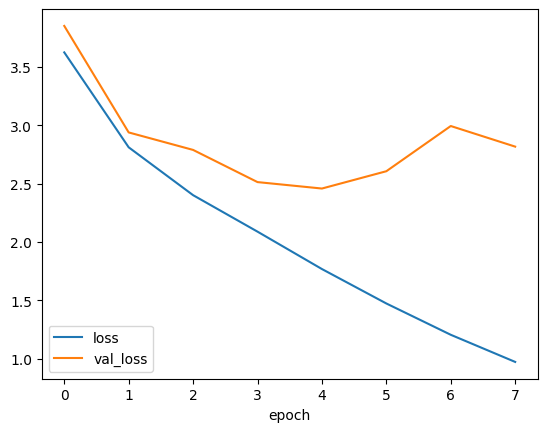

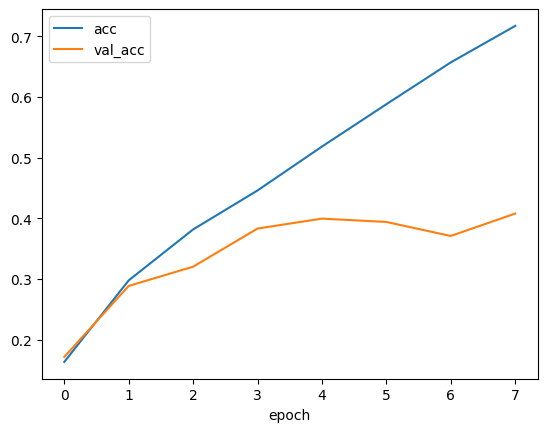

313/313 [==============================] - 1s 4ms/step - loss: 2.7768 - accuracy: 0.4179
2.7767536640167236
0.4178999960422516


In [20]:
# Criando um modelo de rede neural sequencial.
model6 = keras.Sequential()

# Adiciona uma camada de convolução 2D com 32 filtros de tamanho 5x5, que usa a função de ativação ReLU
# e tem uma entrada de imagem 2D com altura e largura de 28 pixels e um único canal de cor (escala de cinza).
model6.add( keras.layers.Conv2D(filters=32, kernel_size=5, padding='same',
                                activation ='relu', input_shape=(32,32,3)) )

# Adiciona uma camada de max pooling 2D que reduz a dimensão da imagem de entrada pela metade
# (em ambas as direções - altura e largura) usando uma janela de 2x2 pixels e um passo de 2 pixels.
# A camada é adicionada à rede neural após a camada de convolução, o que ajuda a reduzir o número
# de parâmetros e a extrair as características mais importantes da imagem.
model6.add( keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model6.add(BatchNormalization())

# Adiciona uma camada de convolução 2D com 64 filtros de tamanho 5x5, que usa a função de ativação ReLU
# e tem uma entrada de imagem 2D com altura e largura de 28 pixels e um único canal de cor (escala de cinza).
model6.add( keras.layers.Conv2D(filters=64, kernel_size=5, padding='same', activation ='relu'))

# Adiciona uma camada de max pooling 2D que reduz a dimensão da imagem de entrada pela metade
# (em ambas as direções - altura e largura) usando uma janela de 2x2 pixels e um passo de 2 pixels.
# A camada é adicionada à rede neural após a camada de convolução, o que ajuda a reduzir o número
# de parâmetros e a extrair as características mais importantes da imagem
model6.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model6.add(BatchNormalization())

# Adiciona uma camada de convolução 2D com 128 filtros de tamanho 5x5, que usa a função de ativação ReLU
# e tem uma entrada de imagem 2D com altura e largura de 28 pixels e um único canal de cor (escala de cinza).
model6.add( keras.layers.Conv2D(filters=128, kernel_size=5, padding='same', activation ='relu'))

# Adiciona uma camada de max pooling 2D que reduz a dimensão da imagem de entrada pela metade
# (em ambas as direções - altura e largura) usando uma janela de 2x2 pixels e um passo de 2 pixels.
# A camada é adicionada à rede neural após a camada de convolução, o que ajuda a reduzir o número
# de parâmetros e a extrair as características mais importantes da imagem
model6.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model6.add(BatchNormalization())

# Transforma a imagem no formato de "matriz" em um vetor
model6.add(keras.layers.Flatten())
model6.add(Dropout(0.33))

# Adiciona uma camada de 1024 neuronios totalmente conectados (Densa) com função de ativação ReLU
model6.add(keras.layers.Dense(1024, activation='relu'))

# Adiciona uma camada de 10 neurônios totalmente conectados (Densa), que calcula
# as probabilidades de cada classe usando a função softmax.
model6.add(keras.layers.Dense(100, activation='softmax'))

# Compila o modelo model2 com o otimizador Adam, a função de perda de entropia cruzada categórica esparsa
# e a métrica de acurácia. O modelo agora está pronto para ser treinado.
model6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Vamos mostrar como ficou a rede
model6.summary()

# Definindo os callbacks
meus_callbacks =[
    keras.callbacks.EarlyStopping(patience = 3), # Se a validation persistir por 3 epocas, para o treino
    keras.callbacks.ModelCheckpoint(save_bet_only = True, filepath='model.h5')
]

#treina o modelo
history = model6.fit(train_images, train_labels, epochs = 15, validation_split = 0.2, callbacks = meus_callbacks)
plot_history(history)

# Testando o Modelo
test_loss, test_acc = model6.evaluate(test_images, test_labels)

print(test_loss)
print(test_acc)

### **DATA AUGMENTATION**

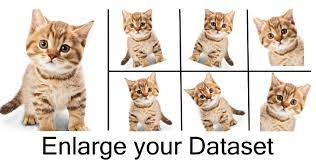

In [21]:
!pip install imgaug

In [22]:
from imgaug.augmenters.blur import GaussianBlur
from imgaug import augmenters as iaa

# Preparando os parametros para gerar as imagens
seq = iaa.Sequential([
    iaa.Fliplr(0.5), #Flip Horizontal
    iaa.Crop(percent=(0, 0.1)), # Cortes aleatorios
    iaa.Sometimes(0.1, iaa.GaussianBlur(sigma=(0, 0.5))), #Blur com sigma entre 0 e 0,5 em 50% das imagens
    iaa.Affine(
        scale={"x":(0.8, 1.2), "y":(0.8, 1.2)}, # almenta a escala
        translate_percent={"x":(-0.2, 0.2), "y":(-0.2, 0.2)}, #desloca imagem
        rotate=(-25,25),
        shear=(-8,8)
    )
], random_order = True) #aplica em ordem aleatoria

# gerando novas imagens com os parametros passados, tendo como base as imagens de treino
images_aug = seq.augment_images(train_images)
images_aug.shape

(50000, 32, 32, 3)

In [ ]:
# Agora nós vamos colocar as imagens geradas dentro do dataset original, junto com os respectivos labels
from sklearn.model_selection import train_test_split
train_images, x_val, train_labels, y_val = train_test_split(train_images, train_labels, test_size = 0.2)

for i in range (3):
  train_images = np.vstack((train_images,
                            seq.augment_images(train_images[:40000])))
  train_labels = np.vstack((train_labels, train_labels[:40000]))

print(train_images.shape)
print(train_labels.shape)

In [ ]:
from keras.layers import BatchNormalization
from keras.layers import Dropout

# Criando um modelo de rede neural sequencial.
model7 = keras.Sequential()

# Adiciona uma camada de convolução 2D com 32 filtros de tamanho 5x5, que usa a função de ativação ReLU
# e tem uma entrada de imagem 2D com altura e largura de 28 pixels e um único canal de cor (escala de cinza).
model7.add( keras.layers.Conv2D(filters=32, kernel_size=5, padding='same',
                                activation ='relu', input_shape=(32,32,3)) )

# Adiciona uma camada de max pooling 2D que reduz a dimensão da imagem de entrada pela metade
# (em ambas as direções - altura e largura) usando uma janela de 2x2 pixels e um passo de 2 pixels.
# A camada é adicionada à rede neural após a camada de convolução, o que ajuda a reduzir o número
# de parâmetros e a extrair as características mais importantes da imagem.
model7.add( keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model7.add(BatchNormalization())

# Adiciona uma camada de convolução 2D com 64 filtros de tamanho 5x5, que usa a função de ativação ReLU
# e tem uma entrada de imagem 2D com altura e largura de 28 pixels e um único canal de cor (escala de cinza).
model7.add( keras.layers.Conv2D(filters=64, kernel_size=5, padding='same', activation ='relu'))

# Adiciona uma camada de max pooling 2D que reduz a dimensão da imagem de entrada pela metade
# (em ambas as direções - altura e largura) usando uma janela de 2x2 pixels e um passo de 2 pixels.
# A camada é adicionada à rede neural após a camada de convolução, o que ajuda a reduzir o número
# de parâmetros e a extrair as características mais importantes da imagem
model7.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model7.add(BatchNormalization())

# Adiciona uma camada de convolução 2D com 128 filtros de tamanho 5x5, que usa a função de ativação ReLU
# e tem uma entrada de imagem 2D com altura e largura de 28 pixels e um único canal de cor (escala de cinza).
model7.add( keras.layers.Conv2D(filters=128, kernel_size=5, padding='same', activation ='relu'))

# Adiciona uma camada de max pooling 2D que reduz a dimensão da imagem de entrada pela metade
# (em ambas as direções - altura e largura) usando uma janela de 2x2 pixels e um passo de 2 pixels.
# A camada é adicionada à rede neural após a camada de convolução, o que ajuda a reduzir o número
# de parâmetros e a extrair as características mais importantes da imagem
model7.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model7.add(BatchNormalization())

# Transforma a imagem no formato de "matriz" em um vetor
model7.add(keras.layers.Flatten())
model7.add(Dropout(0.33))

# Adiciona uma camada de 1024 neuronios totalmente conectados (Densa) com função de ativação ReLU
model7.add(keras.layers.Dense(1024, activation='relu'))

# Adiciona uma camada de 10 neurônios totalmente conectados (Densa), que calcula
# as probabilidades de cada classe usando a função softmax.
model7.add(keras.layers.Dense(100, activation='softmax'))

# Compila o modelo model2 com o otimizador Adam, a função de perda de entropia cruzada categórica esparsa
# e a métrica de acurácia. O modelo agora está pronto para ser treinado.
model7.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Vamos mostrar como ficou a rede
model7.summary()

# Definindo os callbacks
meus_callbacks =[
    keras.callbacks.EarlyStopping(patience = 3), # Se a validation persistir por 3 epocas, para o treino
    keras.callbacks.ModelCheckpoint(save_bet_only = True, filepath='model.h5')
]

#treina o modelo
history = model7.fit(train_images, train_labels, epochs = 50, validation_split = 0.2, callbacks = meus_callbacks)
plot_history(history)

# Testando o Modelo
test_loss, test_acc = model7.evaluate(test_images, test_labels)

print(test_loss)
print(test_acc)